In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
microsoft_new=pd.read_csv('microsoft_new.csv')

In [71]:
top10_new=pd.read_csv('top10_new.csv')

In [136]:
top10_new.describe()

,Unnamed: 0,Num_Rated,Num_Reviewed,Rating,user_interaction
count,873.000000,873.000000,873.000000,873.000000,873.000000
mean,495.640321,2459.504009,948.758305,3.999427,45.005986
std,283.441747,13564.245123,3751.643142,0.667263,16.593260
min,0.000000,1.000000,1.000000,1.000000,1.904762
25%,254.000000,36.000000,16.000000,3.500000,33.333333
50%,496.000000,146.000000,61.000000,4.000000,43.835616
75%,739.000000,897.000000,395.000000,4.500000,56.756757
max,986.000000,319171.000000,61109.000000,5.000000,100.000000


In [72]:
top10_new.head()

,Unnamed: 0,App_Name,Category,ESRB_rating,Num_Rated,Num_Reviewed,Rating
0,0,iTunes,music,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
1,1,AdBlock,productivity,Rating Board ESRB. Rated For all ages.,1112,688,3.5
2,2,World National Parks,personalization,Rating Board ESRB. Rated For all ages.,74,24,4.5
3,3,Movie Maker 10 - Tell Your Story,photo/video,Rating Board ESRB. Rated For all ages.,3428,694,4.0
4,5,Crackle,entertainment,Rating Board ESRB. Rated For all ages.,4834,828,3.5


In [4]:
microsoft_new.head()

,Unnamed: 0,App_Name,Category,Comment_header,Comment_rating,ESRB_rating,Num_Rated,Num_Reviewed,Rating
0,0,iTunes,music,Don't bother...,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
1,1,iTunes,music,NaN,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
2,2,iTunes,music,iPod won't work with it,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
3,3,iTunes,music,MICROSOFT STORE IS TRASH,1,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5
4,4,iTunes,music,Love it,5,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5


Text(0.5,1,'Number of Apps by Category')

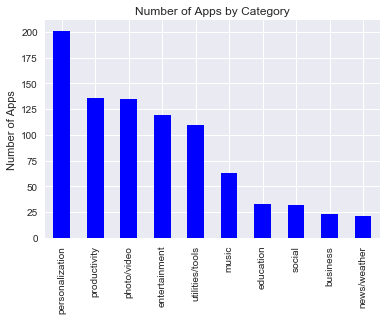

In [93]:
top10_new['Category'].value_counts().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Number of Apps')
plt.title('Number of Apps by Category')

NameError: name 'Category' is not defined

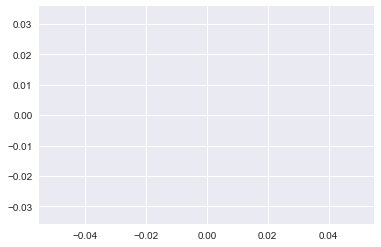

In [134]:
top10_new[top10_new['Category']=='social']

,Unnamed: 0,App_Name,Category,ESRB_rating,Num_Rated,Num_Reviewed,Rating,user_interaction
42,47,SendFreeSMS,social,Potential violation,378,38,3.5,10.052910
96,112,Match™ Dating - Meet Singles,social,Potential violation,29,18,3.5,62.068966
107,124,All in One Dating,social,Rating Board ESRB. Rated For ages 17 and up.,47,17,4.0,36.170213
109,127,GMessenger Free,social,Rating Board ESRB. Rated For all ages.,245,123,4.0,50.204082
151,179,Multi Version Bible,social,Rating Board ESRB. Rated For all ages.,313,160,3.0,51.118211
228,264,Talk to Someone,social,Rating Board ESRB. Rated For ages 17 and up.,5900,3103,4.0,52.593220
253,291,Unigram - A Telegram universal experience,social,Rating Board ESRB. Rated For ages 13 and up.,878,528,4.5,60.136674
274,313,"All Messenger : Social,Mails,Drives",social,Rating Board ESRB. Rated For ages 13 and up.,132,22,4.0,16.666667
300,343,Likegram for Instagram,social,Rating Board ESRB. Rated For ages 13 and up.,56,41,4.0,73.214286
349,397,Desk chat,social,Rating Board ESRB. Rated For ages 13 and up.,178,98,4.5,55.056180


In [74]:
User_interaction=top10_new['Num_Reviewed']/top10_new['Num_Rated']*100
User_interaction
top10_new['user_interaction'] = pd.Series(User_interaction, index=top10_new.index)
top10_new

,Unnamed: 0,App_Name,Category,ESRB_rating,Num_Rated,Num_Reviewed,Rating,user_interaction
0,0,iTunes,music,Rating Board ESRB. Rated For ages 13 and up.,3758,1451,3.5,38.610963
1,1,AdBlock,productivity,Rating Board ESRB. Rated For all ages.,1112,688,3.5,61.870504
2,2,World National Parks,personalization,Rating Board ESRB. Rated For all ages.,74,24,4.5,32.432432
3,3,Movie Maker 10 - Tell Your Story,photo/video,Rating Board ESRB. Rated For all ages.,3428,694,4.0,20.245041
4,5,Crackle,entertainment,Rating Board ESRB. Rated For all ages.,4834,828,3.5,17.128672
5,6,Islands in the Sun,personalization,Rating Board ESRB. Rated For all ages.,55,21,4.5,38.181818
6,7,Movie Edit Touch,photo/video,Rating Board ESRB. Rated For all ages.,1395,423,2.5,30.322581
7,8,JAR File Opener,utilities/tools,Rating Board ESRB. Rated For all ages.,764,325,2.5,42.539267
8,9,Connected Devices,utilities/tools,Rating Board ESRB. Rated For all ages.,162,107,4.0,66.049383
9,10,Color Splash Effect,photo/video,Rating Board ESRB. Rated For all ages.,220,78,4.0,35.454545


Text(0.5,1,'User Interaction by Category')

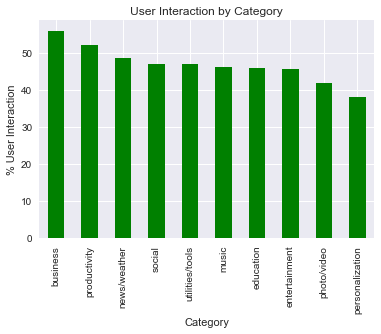

In [124]:
top10_new.groupby('Category')['user_interaction'].mean().sort_values(ascending=False).plot.bar(color='g')
plt.ylabel('% User Interaction')
plt.title('User Interaction by Category')

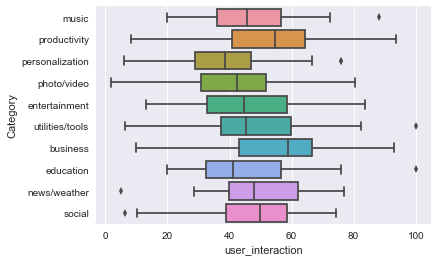

In [135]:
sns.boxplot(y="Category", x="user_interaction", data=top10_new, orient='h')

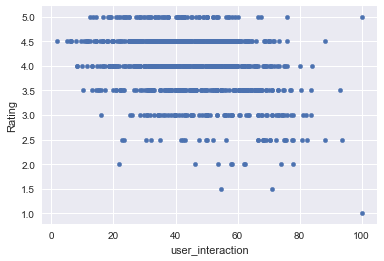

In [77]:
top10_new.plot.scatter('user_interaction', 'Rating')

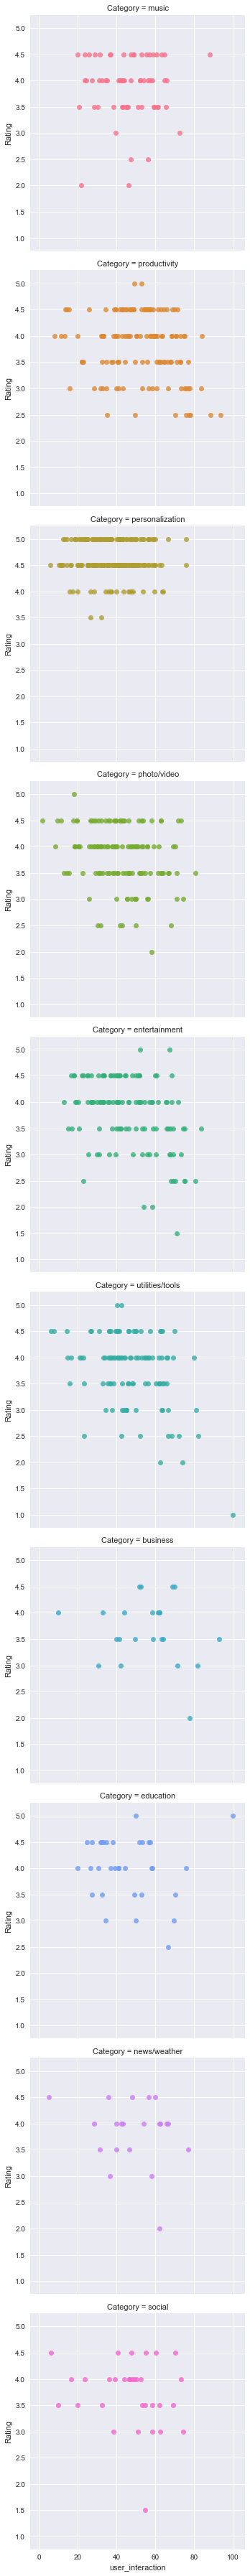

In [86]:
sns.lmplot( x='user_interaction', y='Rating', data=top10_new, fit_reg=False, hue="Category", legend=True, row="Category")

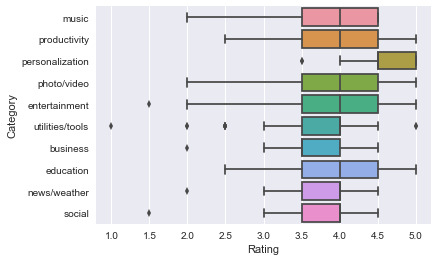

In [115]:
sns.boxplot(y="Category", x="Rating", data=top10_new, orient='h')

(873, 8)


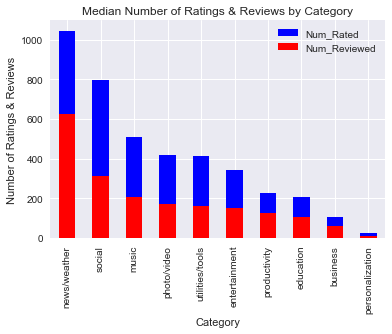

In [139]:
top10_new.groupby('Category')['Num_Rated'].median().sort_values(ascending=False).plot.bar(color='b')
top10_new.groupby('Category')['Num_Reviewed'].median().sort_values(ascending=False).plot.bar(color='r')
plt.ylabel('Number of Ratings & Reviews')
plt.title('Median Number of Ratings & Reviews by Category')
plt.legend()
print(top10_new.shape)


In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAFOCAYAAACc8oqPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3Xm8nOP5x/FPVoQgIlH7Wl9qp4QiorVTSrWqVFFLNUgttasojV1/qKXWSAQlqC2xVC2hltpFuDTUVlSQSGyJJOf3x/2MMznmnEzOOfM8I+f7fr3yyuz3NXNmnuu5904NDQ2YmZk11bnoAMzMrD45QZiZWUVOEGZmVpEThJmZVeQEYWZmFTlBmJlZRV2LDmBuIWk54D/AQxGxWZP7hgK/BPpExAdz8Jp/Bj6IiMGSRgFHRsS4doh1MPAbYM2IeK/s9rHAwRHxQDuUMQD4c0Ss3tbXqrK8rYDLgP8Bm0XE52X3vQ5MBT4HGoB5gJmkz/Ou2bzu9kC/iPi9pB2BLSLi0Jq8icYyOwEXAJtn8Tb7N8n+lgOB/2Y3dQIWBG4BjoiIOR7HLum7wDERsescB98K2d9n14h4sg2v8T3g98C3gC7Am8DRETF2Ns9bH/hVRPy6tWXPzZwg2tcXgCQtGxFvkK7MD2zc1heOiO3a+hpNLAgMk7R1aw4idehnwGURcWoz9+9RfgCStCtwFbD4bF53fWARgIi4DbitHWKdnQHAD4DVSO/rVGCTFh7/14g4uHRFUi/geeDu7N8cyT6nXJJDe5DUH7gG2Dkinspu2wN4UNIqETGhhaevBiyVQ5jfSE4Q7WsG8FdgD2BIdtsuwK3AEaUHSfohcALQHfiMdCb7qKQFgcuBtYB3genAw9lzXif9aJ8G/gRsCPQknTHuFxGPZDWVycAawNKkg8ReEfFJhVivyV7jCODspndKaqCsxlO6DqwOnEY6QxPwKXA6cGh2/aaIOCx7mQUkjQRWAiYBB0TEK5K6A2cAm5HO9p4BDo2Iydn7fBxYEzguIm4pi6kbcC7p4Dkje9xhwK+BHwGfS1ooIn5X4f2Wv7dOwPLAR9n1+YGLgW8DvYEpwM+BhbPX7iLpY+DfpDPdHSQ9ADxKSv7LAH/P3t9MSXsDx5BqLP8ABkVEV0mrAFcA85L+bpdHxEUVQhxPOhNeH9gauK+l91PBYkAPYGL2/lYFzsveWxfg/Ii4UtK1wFMRcU72uINIyelistpfc38rYF9gvYj4RfZ3+TB7n1dJ2gQ4h/R3uir7XGcCTwEHRsTMCjEPlLQWqXZ3ThbfZcD7EXF8Ft+ewI8jYucmzz0ZOKWUHAAiYoSkL0h/u85U+M2QvsN/ABaSdFVE7NPCb7MHcEn2GpOAcVk5e0taDfhz9vk2ZPEPy2rR55F+Iwtk7/+dKt5P3XAfRPsbBvyi7PovgaGlK5K+TUoe20XEOsABwM3ZQepk0kFlFeAnpANuU/2AJYCNIuI7wNWkg1HJesA2wKrActnrVPIFsDtwoqR15+gdpgPX6RGxNikhHQtsD6xL+qEvkT1uaeDc7HHXAsOz248hJb/1ImIt4B1SkikZGxGrlieHzAmk975W9q8zcFZEnEU6s/9TC8lhhKTnJL0NvEX6jH+Y3bctMCkiNoqIlYF/kZp1HicdFP5a+lE3sSLpgLpm9hqbSfoO6YC6Rfb3nUw6sAL8Drg9ItYDtgP6Zwevpj4EHgEeAyZExEnNvKeS3SQ9K+nfkj4kNU8dGBFPSOoKjCQ1Ga1HOtAfKWlDUpPc3mWvs3d2W7nm/lY3A1tn8W9COghumT1nR+AmYGegZ/b3Xz+7b4Vm3sPnEbFu9hqnZQfdC4F9svcA6bdySYXnfpf0ec0iIm7KmlAr/mYi4i1Ss9SYLDm09Ns8kXRCvQqwBbAOQBbbbcAFEVH6HgyRtFEWxurA7tl951X5fuqGE0Q7y85iZkhaT9LSpB9IeTvolqRmjfskPQuMIJ1drUT64g2LiIasWtz0AElEPEo6UB4o6WxSrWKBsofcFRFTI+JL4AWy5pFmYn0he61rsx9Btf4TEc9kl18F7o+IaVltY3JZmc9HxD+zy0OB70paCNgB2Al4JvsMfgR8p+z1xzRT7rbAJRHxZXYWekF2WzX2yA5wm5L6I56NiNcAImIkMFTSIZLOIx30F2j2lRrdHhEzI2Iy6ax/EdIZ/z0R8Xb2mAvKHn8LcJSkm0k1y0Obnk1Lmo90sHsBOAr4uaSVJI2Q9K1m4vhrdhBejXRgng+4PbtvZVIiuzL7rB/M7l8HeACYV9J3s8TWh6/XVir+rSLiTVKiLZ2QnAZsntXOSgniYWC1rLZ1DPB/ETG+mffwF4CIeAe4B/hBRDxL6tfbPqsFLZHd19RMWjiWVfGbKWnpt7kdcEXZ3/vq7DkrA/NGxM1l8d+UfSYAb5Wam+fg/dQNJ4jaGA7sSapJDG9yXxfgvohYu/SPVG0tJZFOZY+d3vSFs07TO7Ort5LOQMqf83nZ5YYm931NRFxAOridV+HuTlmZ3ZvcPrXJ9S+befkZTa43ZI/tQmqOKL3/DZi1zbtSkxjZ88r7SzoD3Zp5bEUR8R/S3+VsSRvAV00rV5CaFK4FrmM2n1um0mc9vclzv/oMIuIOUnPLDaQD9AuSmrZ/bw18ERHHZjWj4cATpAPx+7N5b9OAg4GFgLOym7sAH1f4vl2V9T1dAewF7EM6ADbtj2rpb3UL6cC5FamW8gawG6k28Gr2Wa9ESh4LAn/PmnAqKf+udKbxO3UhqTlrX+DSZvrLHsve0ywkXShpiyp+M+XvtbnfZnN/16bfyVL8pe9l0+9yNe+nbjhB1MY1pKad3UgHnHL3AVtl7dFI2o7UVzAfMBr4laTOWUfjThVee0vSmevFwJOkM7ouFR43J/YhNRGtVHbbBFLVHVJ7fGusJWnt7PKBwMMR8Rmp4/RgSd2zJorLSAeR2bkLOEhSt+x5A4F75zSorFYzDLgoe52tgaERcQUQpKan0mc6nTlLQncDW0haMru+X+mOrM1/t4i4njSKbDLp7L7ceODbkpbJrv8dmJ90wGyuBlH+3qYBBwG/kbRO9n4+z9q7yWq1Y0kJB1LNbkfS9/WqZt5Pc3+rm0nfjc5lZ/5nks6gS4n3KlKN6ujstZprztw7e84ypJp0qSYzkpRMdwWubOa5pwInSSq9J7J+oF1JNbGWfjPlf9+Wfpt3kpqHOmf9ET8nJYaXgS8l7ZI9ZwngxzT/vazm/dQNJ4gaiIj/Ai8B/46Ij5rcN47U9ni9pOeAU4AdI3UkDyYdCF4mNRG8UOHlLwEGSHqB1GH9KrB8M23Z1cY7gdRXUl5TOBS4UNLTpP6Md1vx0i+RfrjPkQ5Cv8xuPwV4ndThOY50ZnZEpRdo4lTgPeDZ7LW7AYNaERekfpPlgf1JnfQHSnqe1Lz1NI3J8h+ktvYLKr5KExHxCqnj/G5JT5I+u8+yu08B9sg+j8dJZ+APNXn+WOAQ4DalYceDSc1i91LdZ0REPExqHrmQ9H3aCdgve3/3ACdGxCPZY9/L3u/z2UG+qWb/Vtl3uYHGg/ndpH6nm7Lrw0gH4nGSniLVbM5vJux5s+/aKOCQ7HMsJbyRwD+jmSHiETGGlIjPy/pixpEO0ptHxP9o+TfzGLCCpJtn89s8jdRv9wIpab8PfJY15f4IGJR9vn8H/hAR9zcT62zfTz3p5OW+zdqPpOVJTTanRBrRtAtpPH6/gkP7Rsr6xh4CBkbEYwXG8TNgckSMyhLLTaSa0cVz+Dp18X6q5RqEWft6m9T5+EJ2FvpbUnuzzSFJW5M6wkfXwcF0LHB81nk9ljSa6/I5eYE6ez9VcQ3CzMwqcg3CzMwqcoIwM7OK5pqlNiZMmNLmtrJevXowceJns39gjdVDHPUQQ73EUQ8x1EscjqG+4miPGPr06dnsnB/XIMp07drW6QTtox7iqIcYoD7iqIcYoD7icAyN6iGOWsfgBGFmZhU5QZiZWUVOEGZmVpEThJmZVeQEYWZmFTlBmJlZRU4QZmZW0VwzUc7M6kffvj3b9fXef39Ku76eVcc1CDMzq6hD1SCqO6tp/jE+izGrT08//STHHXckV199PYstljbeu/jiC1h22eXYbrvmdjmdc6NG3c7ll1/CEkssSffuXfnoo0msscZaHHHE0c0+59VXxzNlymTWXru5zfQaTZ06lT322JWRI2+f7WPz4BqEmc0VunbtxpAhf6DWWxhsueU2/PnPlzJ8+HCuvPIaxo8PXn55XLOPf+CB+3j99ddqGlOtdKgahJnNvdZb77vMnNnAzTffwI9/vNtXtx9wwN5ceunQry6ffPIQRo26nf/+920mTZrElCkfs/POP+GBB/7BW2+9wfHHn8zqq69RVZmfffYZU6Z8wvzzL8Cnn37C6aefyiefTOHjjyfxwx/uzCab9Gf06Dvo2rUbK6+8ClOnTuXSSy+iS5cuLLHEkhx11PFMmzaNP/zhBKZMmcKSSy5Vi4+m1ZwgzGyuceSRx7D//r9kgw02mu1j55lnHs499wKGDx/Ko48+wpln/ok777yN++67p8UEce+9d/Hiiy8wadJHdO8+L3vttS9LL70MES+zxRZbsdlm3+eDDyZw8MEHsPPOu7LttjvQu3dvVl11NXbf/cdcfPHl9Oq1CJdddjGjRt3Ol19OY/nlV+TAAwfy4otjefrpJ9vzI2kTJwgzm2sstNDCHHroEQwZMpg11ljra/eXNz+tvPIqAPTsuQDLLbd8dnlBpk2b2mIZW265DQcddAhffDGJffbZl2WWWQaA3r17c8MN1/Lgg/fTo8f8TJ8+fZbnTZo0kQ8//IATTzwGSP0NG2ywIR9/PIl+/VJCW2211enatX4Oy/UTiZnNNYoc0LHJJv156KH7GTXqDnbbbQ8mTpzIjBkz+Oyzz3j33Xe+elynZndBqM7SSy/N4YcfzYknHsPw4Tdw3XXDWX31Ndl55115+uknefTRhwHo3LkzM2c2sNBCC9O3b19OP/1cFlhgAR5++EHmm68Hr746nrFjX2DTTQfwyisvfy2xFKmmCUJSP+CMiBggaSVgKNBA2vR7YETMlHQSsD0wHfhtRDzR3GNrGauZzT0GDTqCp576F71792b99Tdg//33Yskll2appZZu13LWX78f3/3uBlxxxV/YeOP+nH32adxzz2gWWmghunTpwrRp05BW5aKLzmO55ZZn0KAj+d3vBtHQ0ECPHvNz4okns9Za63DaaSdz0EG/Ytlll6Nbt27tGmNbdKpVj7+ko4BfAJ9GxIaSbgPOjYgHJF0C3A28AZwN/ABYGrgpItav9NiIuKWl8qrZUa6tk3fyOivq06cnEyYUO6S2HmKolzjqIYZ6icMx1Fcc7RFDSzvK1bIG8SqwCzA8u74e8GB2eTSwFRDAPRHRALwpqaukPs08tsUEYWbWXo477ndMnvzxLLctsMACnH76uQVFVIyaJYiIuEnScmU3dcoSAcAUYCFgQeDDsseUbq/02Bb16tWj5tvv9enTvssH1EtZ9RwD1Ecc9RAD1EccHSGGyy67pC7iKDqGPDupy/sQegKTgMnMOnW5dHulx7aouo272/ZB5lWdnFuqrnNLHPUQQ73E4RjqK452amJq9r48Z1I/I2lAdnlbYAzwCLC1pM6SlgE6R8QHzTzWzMxylGcN4gjgMkndgZeAkRExQ9IY4FFSshrY3GNzjNPM2qhP3wXb9fUmvD+5XV/PqlPTBBERrwMbZpdfATar8JjBwOAmt1V8rJmZ5ceL9ZnZN97TTz/JNtsM4H//e++r2y6++AJGjWrfVVFHjbqdXXbZnoMPPoBf/OIX7L33zznnnDPm+HVOOulYvvzyy3aNrWTq1Knsumv7rGDrBGFmc4V6Xc21kpNPPq2uJsQ1x0ttmNlcoejVXKdPn85ZZw3h7bffYubMmey//0EsuOBCnH/+OZx/fho2e9RRv2W//X7Nccf9jhEjRjJp0kTOPHMI06ZNpXv3eTjqqOO4/voRrLnmWmy++RYcfvjB9Ou3Ebvttgenn34K22+/I9OnT/9qRdgVVliOQw89qmYrwjpBmNlco8jVXG+5ZSQLLbQwxx77ez7+eBIDBx7ANdfcwNSpU3nvvXfp2rUbkyZN+mqRQIALLzyPXXfdjY022pgnn3yCSy75MzvttAujR9/B9763CVOmTOHJJ5/gpz/9Oa+88jJHH33CLCvCjhhxRU1XhHWCMLO5RpGrub766nief/4Zxo0bC8CMGdP5+ONJ7LDDTtx1151069bta7vbvfbaeIYPv4oRI64GoGvXrqy55tqcd97ZPP30kwwY8H0eeOA+nnvuGVZbbc2vrQg7c+Z01lln/ZqtCOsEYWbtrshhqUWt5rrsssvRt29f9tprX6ZO/YKrr76Snj0X5Ac/2IpBgw6iU6dO/OlPf57lNZZZZjl2331P1lhjLd5443WeeeYpOnfuzCqrfIcRI4YxaNARfPTRh1x00fkccMBvvrYi7PPPP8GXX3aq2YqwThBmNtcpYjXX/fc/iDPOOJWDDz6ATz/9hJ13/gmdO3emR48erLTSysyYMZ35519glucPHDiIc845nWnTpjF16hcMGnQkAP37b86QISez0kors8EGHzF69J2svfa6dO7ceZYVYRdeeEGOPvr3NVsRtmaruebNq7nOfTHUSxz1EEO9xOEY6iuOb/JqrmZm30hezTVxgjAza2LIkLOKDqEueKKcmZlV5ARhZmYVOUGYmVlFs00QkhaRtEV2+VhJN0pasfahmZlZkaqpQVwHrJ0liZ8AtwGX1zQqMzMrXDUJoldEnA3sBAyNiOG0de9OMzOre9UMc+0saT3gR8Bmktau8nlmZvYNVk0N4ijgLOCciHgNuAQ4rKZRmZlZ4aqpCawDHBQRARARG9Y2JDMzqwfVJIhuwF8k9QXuBm4HHoqI9lku0MzM6tJsm5gi4vSIGABsCAQwDPiwxnGZmVnBZluDkPQTYDNgU2AGcAPwjxrHZWZmBaumielP2eP+D7g5Il6pbUhmZlYPqmliWopUg/gYOEXSM5JG1DwyMzMrVLVrMXUhdVbPl/37rGYRmZlZXaimD+Jt4E1gFDA4Ip6ueVRmZla4amoQawNbkdZgekbS/LUNyczM6kE1CWJN4FngVmAx4A1JW9U0KjMzK1w1CeI0YBNgUkS8B/QnLb1hZmZzsWoSROcsMQAQEeNqGI+ZmdWJauZBvC1pB6BB0sLAQFKntZmZzcWqqUEcCOwBLA28Ruq0PqCWQZmZWfFmW4OIiPeB3dujMEndgKuB5UjLduwPTAeGAg3AWGBgRMyUdBKwfXb/byPiifaIwczMqtNsgpB0R0TsIOk/pIP3LCJihVaUtx3QNSK+J2lL4I+kCXgnRMQDki4BdpL0Bmn2dj9SzeUmYP1WlGdmZq3UUg1i/+z/Ae1Y3itAV0mdgQWBL0mrxD6Y3T+aNOcigHsiogF4U1JXSX0iYkJzL9yrVw+6du3SjqF+XZ8++e20mmdZ9RwD1Ecc9RAD1EccjqFRPcRRyxiaTRAR8W528VbSEt/Xld3WWp+QmpdeBhYFdgD6Z4kAYAqwECl5lC8pXrq92QQxcWI1q3+07YOcMGFKm54P0Ldv2/+Y77/f9jhmp0+fnu3yfueGOOohhnqJwzHUVxztEUNLCaaaTuo9gEWAByXdK+mXkhZoZSyHAXdHxMrAWqT+iO5l9/cEJgGTmfVoXrrdzMxyUs1qri9GxAnZQf0PwKHA/1pZ3kTSqrAAH5H6H56RNCC7bVtgDPAIsLWkzpKWIc3F+KCVZZqZWStUs1hfF2Br4GekjuO7gd+2srw/AVdKGkOqORwHPAlcJqk78BIwMiJmZI95lJTEBrayPDMza6WqJsoBjwEjgP0iYlprC4uIT4CfVrhrswqPHQwMbm1ZZmbWNtX0QawWETsD97UlOZiZ2TdLNQliaUkvA89JWlLSeEnr1jowMzMrVjUJ4gJgZ+DDiPgvcBBwSU2jMjOzwlWTIHpExEulKxFxLzBP7UIyM7N6UE2C+EjSWmTLbUjagzRE1czM5mLVjGI6iDShbTVJk4B/A3vWNCozMytcNRPlXo2ITUizqZeJiPWBqTWPzMzMCtXSaq4rAyeTmpOOjohPJPWUdAZwCNAjpxjNzKwALdUghgLvAb2BEyV9n7TI3ibAFrUPzczMitRSH8SiEXFYtgTGi8BuwBERcX0+oZmZWZFaqkF8CpDNnp4X2MrJwcys42gpQZTvIvdBRLxS62DMzKx+tNTE1FvSXkAnYJHs8lciYlhNIzMzs0K1lCD+AWxe4TKk2oUThJnZXKylLUf3yTMQMzOrL9UstWFmZh2QE4SZmVXUqgQhybOozczmctUs1geApF8AE0lrMh0CrF+roMzMrHgtrcXUHdgWeDYi3gA+B4YDC+DkYGY212upBnETMB+wuKR9gB8CrwCPAL/O/pmZ2VyqpQSxXESsIWl14GngBqA/MA0Ym0dwZmZWnJY6qcdJuge4g5QgHo2IqcCCwIw8gjMzs+K0VIPYA9gOCOBd4GFJWwJrAKfnEJuZmRWopZnU04HbStcl9QO2Bl6LiOdziM3MzApU9TDXiPgc+FsNYzEzszrimdRmZlaRE4SZmVU02wQhaRFJW2SXj5V0o6QVax+amZkVqZoaxHXA2lmS+Amp4/rymkZVIw10atM/M7OOpJoE0SsizgZ2AoZGxHCgZ23DMjOzolUziqmzpPWAHwGbSVq7yudVJOlYYEegO3AR8CAwlLRL3VhgYETMlHQSsD0wHfhtRDzR2jLNzGzOVVODOBo4CzgnIl4DLgEOb01hkgYA3wM2BjYDlgbOBU6IiE1J+1/vJGnd7P5+wM+AC1tTnpmZtd5sawIRcR9wX9n1DdtQ3tbAC8AtpCU7fgfsT6pFAIwGtiLN3r4nIhqANyV1ldQnIia0oWwzM5sDs00Qkt4ClgAmkc7wF8ouvwbsHxHPzkF5iwLLAjsAy5M6vDtniQBgSvb6CwIflj2vdHuzCaJXrx507dplDkKZc3361EfXS15xdLT3W+8xQH3E4Rga1UMctYyhmr6EB4GREfE3AEnbAj8Fzic1/Ww8B+V9CLwcEdOAkPQFqZmppCcp+Uxm1o7w0u3Nmjjxs9kW3mcOAq1kwoQpbXwFaI/+/faJo2V9+vTMpZxvQhz1EEO9xOEY6iuO9oihpQRTTR/E6qXkABARo4E1I+IZ0n4Rc+JhYBtJnSQtAcwP3Jf1TUDaoGgMac+JrSV1lrQMqZbxwRyWZWZmbVBNDWKSpAOBa0gJZQ/gI0mrMIczsSPiDkn9gSey5w4E/gNclu1g9xKptjJD0hjg0bLHmZlZjqpJEHsA5wFnkvaBuBfYC9gVOGZOC4yIoyrcvFmFxw0GBs/p65uZWfuoZhTTf0nJoKkL2j8cMzOrF9WMYtoaOBVYBBrXm4iIFWoYl5mZFayaJqYLSBPjxpJmO5uZWQdQTYL4ICLuqHkkZmZWV6pJEGMknQvcBXxRujEiHqpZVGZmVrhqEsQG2f/rlN3WAHy//cMxM7N6Uc0ops3zCMTMzOpLswlC0qURcYCk+6nQOR0RrkGYmc3FWqpB/CX7f3AOcZiZWZ1pNkFExFPZxV0j4pDy+yRdTeMS3WZmNhdqqYnpcmAF4LuSVmvynIVrHZiZmRWrpSamU4HlSOswnVx2+3TSonpmZjYXa6mJ6XXgdWAtSYuQlubuBHQB1gb+kUN8ZmZWkGrWYhoMHAZ0I234swTwJGm/aPuG6tu3mo2Lmn/M++8Xv2GLmdVWNfs57E3a9e2vwABgR8Cb95iZzeWqSRDvRMRk0mJ9a0XEncy6TaiZmc2Fqllq42NJvwCeAg6R9A7Qo7ZhmZlZ0aqpQfwK6BsRD5A6rf8CHF/DmMzMrA5UsxbTO8A52eUjACTtXuO4zMysYC1NlNuJVFv4ENgpIsZL6keaF7E8cF0+IZqZWRFaqkGcCRwILAucIOkV4DjSDnNb5RCbmZkVqKUEMS0ibgWQ9C6p1rB6NoHOzMzmci0liOlllz8Dto+IT2ocj5mZ1YmWRjGV7wHxsZODmVnH0lINYllJV1a4DEBE7Fu7sMzMrGgtJYjDyy577wczsw6mpdVcr84zEDMzqy/VzKQ2M7MOqNkEIWn+PAMxM7P60lINYgyApItyisXMzOpIS53UPSRdA2wjad6md3oUk5nZ3K2lBLElsDmwKR7FZDVQ3a524J3tzIrR0iimt4Bhkp4DxgHKHj82IqY397xqSOpL2l9iS9KM7aGkiXljgYERMVPSScD22f2/jYgn2lKmWXO8/apZZdWMYuoG/Bu4GrgKeDNb1bVVJHUjrRL7eXbTucAJEbEp0AnYSdK6wGakfa9/BlzY2vLMzKx1qkkQ5wG7RcR6EbEOsAtpRdfWOhu4BHgnu74ejU1Yo4EtgE2AeyKiISLeBLpK6tOGMs3MbA5Vs+XoAhHxeOlKRDxWqdO6GpL2BiZExN2Sjs1u7hQRpXWfpgALAQuS9qGgye0TmnvtXr160LVrl9aEVbU+faptM6+teoijHmKA+ogjzxg62vut5xigPuKoZQzVJIiPJO1UtvT3j5j14D0n9gUaJG0BrA0MA/qW3d8TmARMZtZG39LtzZo48bPZFt7WKsiECe3R1tz2P2Y9xFEPMdRLHO0Tw+z16dMzt7IcwzcjjvaIoaUEU02COAC4RtIV2fXXgD1bE0hE9C9dlvQA8GvgLEkDsj2vtwXuB8YDZ0o6G1gK6BwRH7SmTDMza51q9qT+N9Avm1ndOSLaO2UeAVwmqTvwEjAyImZIGgM8SuonGdjOZZqZ2WxUU4MAICI+bc+CI2JA2dXNKtw/GBjcnmWamVn1vFifmZlVNNsEIenAPAIxM7P6Uk0N4pCaR2FmZnWnmj6ItyT9A3icxtnPRMQfahaVmZkVrpoE8VjZ5U61CsTMzOpLNcNcT86GuK5IWkxvvvYe0WRmZvVntglC0veBS4EuwEbAWEk/j4h7ah2cWUfhpc+tHlXTSX0aafG8SRHxHtAfOKumUZmZWeGqSRCds8QAQESMq2E8ZmZWJ6rppH5b0g6kRfYWJi178WZtwzIzs6JVU4M4ENgDWJq0UN8SajTbAAAehElEQVTapAX8zMxsLlbNKKb3gd0lLQhMj4jZr6ttZmbfeNWMYlqDtN3oMkAnSS8Bv4yIV2sd3NyooR2mkkxgcjtEYmbWsmqamC4Bjo+IRSOiN3AOcGVtwzIzs6JVkyDmi4jRpSsRcQtpS1AzM5uLNdvEJGmZ7OJzko4BrgCmkzqsx+QQm5mZFailPogHgQbS+ksDSKOZShqAQ2sXlpmZFa3ZBBERy+cZiJmZ1ZdqRjGJNO+hV/ntEbFvrYIyM7PiVTOT+hbgeuD5GsdiZmZ1pJoEMcmbA5mZdTzVJIihkv4I3EcaxQRARDxUs6jMzKxw1SSI7wEbZ/+XNADfr0lEZmZWF6pJEOtGxLdrHomZmdWVamZSvyhpzZpHYmZmdaWaGsQqwDOS3gWmkSbONUTECjWNzMzMClVNgvhRzaMwM7O6U02C2KyZ24e1ZyBmZlZfqkkQm5dd7gZsCjyEE4SZ2Vytmh3l9im/LmkR4K81i8jMCtO3b88qHtX8Y95/f0r7BWOFq2YUU1OfAMu1cxxmZlZnqlms737SxDhII5hWAO6sZVBmZla8avogBpddbgA+iIhxrSlMUjfSdqXLAfMApwLjgKHZa48FBkbETEknAduTlvf4bUQ80ZoyzcysdarZUe4/le6LiDdbUd6ewIcR8QtJvYFngGeBEyLiAUmXADtJeoM0eqofsDRwE7B+K8qzZjTQqU3Pn8DkdorEbFZt7QcB94W0l2p3lCtpABYHugNdWlHejcDIsuvTgfWysgBGA1sBAdwTEQ3Am5K6SuoTEROae+FevXrQtWtrQqpenz7VfHFrrx7iqIcYoD7iqIcYoD7iqIcYIL846uH91jKGqneUk7QAcA6wNbB/awqLiE+y1+pJShQnAGdniQBgCrAQsCDwYdlTS7c3myAmTvxstuX3aU3QZSZMaPtZSVtjqJc42iOG2Z0FflPiqIcY6iWOeoih/eJoWZ8+PXMpp9YxtJRgqhrFJOkHNG4YtEZE3NvaYCQtDdwPDI+Ia4GZZXf3BCYBk5n1W1K63czMctJiJ7Wk+YFzyWoNbUkM2estBtwDHBwR92U3PyNpQEQ8AGxLSh7jgTMlnQ0sBXSOiA/aUraZmc2ZljqpfwBcBtwLrF5qHmqj40h7W58o6cTstkHA+ZK6Ay8BIyNihqQxwKOkWs7AdijbzMzmQEs1iHuBL0mdxs9LKt3e6tVcI2IQKSE09bX1niJiMLMOsTUzsxy1lCCWb+E+szZr61Bb8HBbs1pqaRTTG3kGYmZm9aU1azGZzVUa6NSmf2ZzKycIMzOryAnCrA60tRbjmozVghOEmZlV5ARhZmYVOUGYmVlFThBmZlaRE4SZfcUd5VbOCcLMzCpygjAzs4qcIMzMrKIW94MwM8tbvSzi2Na9seeGfbFdgzAzs4qcIMzMrCInCDMzq8gJwszMKnKCMDOzipwgzMysIicIMzOryAnCzMwqcoIwM6vACxc6QZiZWTOcIMzMrCInCDMzq8gJwszMKnKCMDOzipwgzMysIu8HYWZWp9q6JwW0bV8K1yDMzKyiuq1BSOoMXASsBUwF9ouI8cVGZWbWcdRzDeJHwLwRsRFwDHBOwfGYmeWqrbO52zqju54TxCbAXQAR8Rjw3WLDMTPrWOq2iQlYEPi47PoMSV0jYnqlB/fp03P2qbKhoU0B9WnTs9snBqiPOOohBqiPOOohBqiPOOohBqiPOOohBmhbHPVcg5jMrN3znZtLDmZm1v7qOUE8AmwHIGlD4IViwzEz61jquYnpFmBLSf8EOgH7FByPmVmH0qmhHdq4zMxs7lPPTUxmZlYgJwgzM6vICcLMzCpygjAzs4qcIGwWknpk/y9edCwdnaQdmlz/aVGxWMdUz8NccyFpRETsUVDZKzd3X0S8kmcsAJJ+DywEHAGcL+mpiDg97ziyWLYDVgNeiYhbCyh/NdJs/pnAEGBIRNyXU9k7ABsDu0v6XnZzF2BH4IY8YmgSzx3A5cDtETEj7/KzGI4DjgI+Iw17b4iIJQqKpfS92Bm4IyImFhRHX2De0vWIeLO9y+jwCQKYV9KawCukPzoRMS2nsv/SzO0NwPdziqHcThGxHkBE/ETSI0DuCULSacDKwBjgl5L6R8QROYdxCTAIOBk4HjgTyCVBAM8BvYHPgchumwlcl1P5TR0J7AsMlnQ3cHlE/DvnGH4KLBERn+Vc7iwkDQPuAb5HaoHZhZQo8o7jItJE4nfIEmYWU7tygkgHovIz1AZghTwKjojNK90uqXse5VcwU1L3iJgmqRvFNUH2j4iNASSdBzxWQAxfAi8C3SPiMUm5/VYi4i3gaknDI2JmXuW2EM/LwFGSzgLOA8ZKegg4NiKezCmM10kJs2jLRcQ1kn4VEZtLyuukoakNgBVq/f3o8AkiItYAkLQIMDEicp85KOlA4HCgG+ls4EtS4srbJaQf/wvAKqSz5iJ0k9Q5+/KXzo7y1gBcC4zK2v4/LSCGoyUdTcHNKpK2BfYmfSeuAX5L+q6OIu3XkofuwAvZdxPSZ/HznMqeJY7s+zBO0qKkml4RxpOal2pao+rwCUJSf9LGRF2AGyW9ERFX5BzG/sAA4ATgRtIPMHcRcYWk20g1qFcj4oMi4gD+Cjwi6TGgH3B9ATHsBmwQEaMkbZ5dLyKGwptVgD2BiyPigfIbJZ2cYwxn5FhWS84EfkY6oTuU9JstwjLAG5JKm6g1RES7NzF5FBOcCvQH3iN1Rv6mgBg+iIh3gZ7Zj3CRPAuXdEL2/3WkJoRBpE7qa/OMoyQiziElzUeAAyLi//IqW9IBkg4gtS0vlV3+NrBrXjGUeZ36aFaZWJ4csnZ4IuLmHGN4BtiB1FH9IwpavDN7z7sD7wL3kvojirA7aY+cn2X/dq9FIR2+BgHMjIiPJDVExBeSWr/Dd+t9LOlHQEPW3NQuS8nPgduz/y/JudyKJC1J2kWwDzBS0vwR8XhOxdfT8N7yZpUGgDybVSQNJJ0h95K0C6mZqxOpbyZvVwIPAiOAzYChpFFduZJ0BvAasCywLvA/4Jd5xwHMAP4EfIc0wOawWhTiBAHjs1EzvSUdA7xRQAz7ASuRDopHAgflWXhEPJddfAXoRfryHQVckGccZS4lbTF7IvAQcDWwYR4FR8RXzSaSticNtY0ihtpScLNKRFwIXCjpuIgYUmQsQO+IKH0fn5VURI0OYJOIOFrS/QV3Ul8GXEz6fQwArgB+0N6FuIkJfk1KCg8Dn5AO1rmQVNpGdSPS2fIapCprUaOYhgGLAX8kVZ//VFAc80bEP0jtqgF8kXcA2UnDPsA00lDbs/OOAXga2BLYi9QZ+t88Cy+bqPdhqemtrAkub/NJ+lYW12KkPsMidJG0AfB6Ntow79p+ybwRcVtETIqIv5EGDbQ7JwiYH/gAeJy0i11N2vKaUcr4u9PYjrhbdrkIXUlnJAtHxPUU9yOcKmlr0o9xQwpIEKShtrtm/R8/BjYtIIYrSc0ZK5P6yPIePFEaofMtUtNb+b+8nQj8U9KzwD+z60UYRqpZn03qsD6voDi6SiqNwFyDGo30cxNT2pjodVJbIuQ4pDIiSk0IvwPWiYh7JR1MGkpYhO7AucBD2cidor4fB5B+gItSQJNbph6G2vaOiCsl7RkR/5Q0+33X21FEXJ1d7AVcGhHj8iy/SSz3AitIWrTA0XVExEWSRpBGER0fEUUMf4Y0gupKSUuQapY1qdU5QUCniNi34Biuo3FW9UekBLFD8w+vmb1JTRpXADuRhjfmLiLeprhaVEk9DLVF0irZ/0uR+oaK8DBwpqSewFXAXyMil9FVkv4cEQdLepQsSUsCoBbDOquI58ekjvuuwA3Z4JZT844jIp4B1q91OR02QZTNVn5N0kak9t7SSJG8ltoomT8iRmZlXytp/5zLL1kcGEs6IL4HLEVq4siFpHdJf4N5gB7AW8CSwISIWC6vOCANtc2WlRBpaYkiRu4cSjogrwqMpJgh2GTfzZHZAo5/Av4PWDin4k/J/t+L1B9UkutQ8DKHkwZM3EUaIv9k9n8uJI2MiF3LfitQw0mUHTZBkNa4aSB9uOXrHuW21EaZaZK2JC0psQHFnSmWmnI6kUbvvE7qk8hFRCwOIOka0jIOb2VV6Nw7y7Mz9pPIRjFJOiwiXs8zhogYSxrAUChJy5CGcv6YdCK1bY7Fd8oWtRwG/IL03exMqnFvkGMcJTMjYmpWc2iQlGsTU0SURm9tkC3JAjTWNNtbh00QEbE8gKT1I+JfpdslDSggnP1Ibe7nAS8BBxYQAxHxVQd9VsPKfeXQzAqlL39EvJMdoPKWyzDClkj6I2mRvK/6PwpawfQm0mqum0ZE3vOENiRN3BRp+DOkhQvvzjmOkjHZhNKlJF0C/Gt2T2hPklYn1arPkPQ7GhPm6cDa7V1eh00QkjYhTTI5XNK52c2dgYOB1fOMJSLGZ7OZv0Na3vrVPMtvRldgxYLKHidpOPAE6Qx6TAExzBsRt2WX/yapJhORZmN70uJwUwsoG0lLZf1Be5KS1OJZM1Nuy9FnQzj/Jmm7iBiVR5mziec4SduQalIvRcQdOYfQi9Q/txhQmjQ5k7RcULvrsAkCmERqc5+HxmF7M0kTxHIl6VDSENfHgSMl3RARuY+7b9Ku2Y3U1lyEA0jNGKsB10XE7bN5fC10lbRGRLxQGk5YgGdIC7IVkiBI7e2H8/UZ9kUsR/+RpL/QuKDlEhGxdc4xkHXUL0ga9biIpL0iYlhe5UfEGFItZt2IeLrW5XXYBJG1746VdFlEvFO6XWmZ67ztTqq+T8/K/yepySlvB5Imh5U2Idk4z8Il7ZCdkZUmK04inbUeEBGXtvDUWjiEWYcRFjFwYCzwrqT3aOyIzK1/LCIOzy6eW56kVczOdueT+qJ2Ja3DVNRk0ltJezCU2v+LGP4MqYnrNBoT5qKllanbU4dNEGV+KOkI0mdR1FLbnSJiOkBEfCnpy5zLLzmLdPY+qaDySxOz6mE9pKUi4qthhNlB8bkWHl8LuwHLU9DfQ7PubFfqLO9MGgKdd//UpIi4TtJWETFY0oM5l1/SOSIKGf7dxO9JJzG/Bu4HtqhFIU4Q6cxwM4pdavthSSNJbe2bkMadF+HFiCjqh1cXE7NUebvPog6KbwCfFtUHwaw7271MOoGaSTFzQhqUtoHtoTQR4lsFxADwvKR+wLMUNywe4MOIeFTSryNiqKR9alGIE0S21LaknhHxgKQ/FBDDuaRtC3sB65HWQirCrdmEpJdKNxQ0ibCwiVmkH36l7T6LOCguDbwqqTQXpSZr/jcnGne2Gw2sGRF/z1Z4fT2vGMocThrEcT5pI6eiVh7eDPhh2fUihsVDWo6mP2nG/9bUqNbtBFH8UtuQVisdAgwEjiO1tVbcjrTGDiWtL1NUExNQ+MSsk0k7pW1QwJDOporYpKiSETTO9J9IMTP93wMWj4hHJF1FQcvRREReO+jNzkGkHf5OJU0mrMnaVE4QqUN0RQpaajtTWiTvuIi4XlIhM2aB9yLirwWV/ZVs3sNepA7JvCdmHUUaXnqxpHlJzX53FDT0eCZpAMO8ZbcVUcNtOtM/txWPy1xPgcvRVFryo6SIJT9I82NOj4gvgR9LOp20PEy7coJIe7p+l1Sdv500ciRvpUXyxhS8SN7nku4iDa8sta8eV0AchU3MiogPSbN2h0nqStptcKCklSIi7w1qbgT+TuOImaI0nek/s4AYil6OprTkR9FrhJUcCnxP0q7ZgoE1mVXuBJHOSt4hLVL3JOngsF3OMexNHSySR+POcoWQdDNpm9E9s30gioxlflKf0DjSwIFDCghjSkQUtedxudJM//NJn0cRM/0LXY4mIkqrPS9Amgcxk9QsPIRiNhkbS1p2/G6l3f683HeNrBgR+0naJCJuV9pVLlcR8W/g39nVopa3KB9FVJRdSQfjX2Vry4wH7gQeLA0DztEIUgf5j0kHxUuBvCdmjZX0M2at0eUyg7lcRIwn7QNdpHpIUpA6xweR+qqOJ/XZFbKrXESMUtoieTQ12tvHCSLNmF0UvpolWUT12YBs74WHsn9IWp40YuTXwE9yDqcXcBswKCL2ypZXyNvazLq+ThEzmMtn2HciraL6WkSsmmcMdZKkIM2TehHoHhGPZc2QRXgQ0szqrE9oeC0KcYJIZwGPkIaJPUY6O7ACSVqQNC9lNdI+2UWcLXYHjgCekvQdUtNCriKiiJFsX1NaZRdA0rLA4LxjqIcklWkgDbMdlU2ezHU117L1sa7NVrkli2GXWpTnBAHTIkKS+pDmRBQ1dd4aXUmqRVxLGnc+FMi7g/gI0hnrH4E9yHEvhrzX/J8TEfFGrZaWnk25hSepzG6kPpDRpFV+8x6KfARwGI0jukpqUrvs1NDQsY+Hki4D1gEeBW4mtXe7malAku4vP3uWNCYict8TWtIWpKUuHietslvE3tiFy5a3Lh0oliAte1Foc4+kRyMi970yJO3V9LY8F+vLW4evQUTE/gCSNiV1OK1EMZPlrNF8kr4VEe9JWgzokncAkoaQdtRblbST2bGkOQl5xrAhafHEQlcwZdZZy1+QRvvlqkKS+l8LD6+lUrNWJ1L/0EekkY+5aFKrLPGOcrUiaRBpoas+pL6Ik4qNyEizQv8p6WPSkMIiVlLdJCL6Z7WZqyUVMYGy0BVMK50tl+4ix4NipvAkBRARx5YuS+oE5LofRHlTWx46fIIgzdJdmDQ56+6IeL7geAwmRsQKkhaNiA8kbVZADF2zmdQNkrpQzDawRa9gWjpb7kdam+qfwPqkGk0uCaLOklT5XvaQajLL5x1DFkcutcsOnyAiYpvsQLA5cJ6kVfLO0pZkzXzfAQ5TtsufpEJ2+SOduT9Fqlk+TgH7YlPwCqals2VJd0XE9qXbJd2TYxiFJ6kmgnRA7g28DZxRQAyQU+2yJpMrvkmyWYh/Jo1W+TcpK1sxJpIOgqVd/hYnHaBz3+UvIm4kTdrbHtgmIkbkHQNpBdPVaFzB9OICYgDoK2lhAEm9ady3o+Yi4tgsUU2LiO0j4o9ZB3kRG3tBWlBzJmkSZ1eKmUUNWe0SmBwRg0n9Ze2uw9YgJC0bEW8Am5KGUe7vIa7FKt/lj9TOvCLwn4j4IK8YJJ0QEac26RRFEhHx8xaeWgsbRcTl2eX1lLamLcIfgSclTSb1CRWxBHxfSQtHxKS8k1QTJwH9ImKCpG8BfwM2LCCOXGqXHTZBAIdLWo40bd+Job5sQlrGeBywuqTBEZHX8s6l9aiK2m8ASbuT5n1sLqk0tr0zsAapNpGriLgpWyerNFeoiGHgpwL/ypocGyiupj8lIiYAZKPscp0oV6Zp7bIm39cOmyAiYhBANkt2B+BISZOAu+phyesO7jBg3Yj4JFv+5B/kt/7/2KwjchBpElQn0jDbO8lvmYu7gHdJZ8mlCVEzgSKWHCdbYfgK4GOgl6T9I+LenMP4kDTceF7gOtK2wGPyKjwb9gxp8MIdpE2tNgAK2e0vIl4kLfkBaZOxmuiwCaIk29ZyHEA2m/oHxUZkwMyI+AQgIqZIynOC2r6kTZu+RWOH5Axy3AY2IiYCD2QH4sK2gC1zCmnY7zuSliRNKM07QZxCag4eSWryeoSUtPISTf4HuDXH8mch6ThS39xnpds8D6IGJP2EdIY4D3BW9s+K9aqkc0jLbfQnxzPniLgMuEzSvhFxZV7lNmMeSWuS1qOaCYXtfzwjIt7Jyv9vzgm7ZGZEfJT1BX2RrWKamzpY6bipn5KGtn4220e2QYdPEKRd5LYj7Vi1NHAPThJF25e0QN+WpNrd0XkVLGm/rGP422XNCkAhmyeJWc9Si9r/eLKkQ2hM2B8VEMN4SacBvbMl+YsaPVQvXicN+60pJ4jGNsQpETE1a/O2Ys1PWkqhdJb4c/Ib817ave3lnMprVkSsASBpEdLkwaIGU+xJWl33j6SEXcQopl+T9oR4mLR6aRGz6+tJd+AFSS9k1xtqMcrOCQJeI03bP0TSSaRJUVasW0hnSKX1dvI8MDZI2orUSVwoSf2Bi0hNoDdKeiMi8mx3L7koIvYooNyvZBtGFTayrA7lMkHPCSItwjYlGzHzZES8V3RARqeIKOIsFZpfkK+B1PyYp1NJTTo3kba2zLtjtmTeOukLsUbPkNYs+w7p73JKyw9vHSeINEluHkm3k0ZnWEHK1rl5TdJGwNM0brWZ1wFp/4iY3mTNnaKUOmYbiuiYLbMyaVG6PsD7pFFdRfSFWKMrSbvKjaCGe6Z0+KU2sgWudiStqzJC0jMFh9SRBant//vAX4FJpOVP8uwPKPV1lGJ5uexy3uqlY/YkUs3hZWA6qT/AitU7Ii6IiGcj4jzSFrntrsMnCEk7karvR5LanYta76bDi4jlI2IF0q5ZhRyQyjr6fhoRK2T/lqe4jtk3aOyY3a+AGCA1ZWwQEesA3yM1fVmx5suW+qCWe6a4iSl19nwBnE6aRT2p4His8YD0fvblv52c2v8lbUJawuCrFWVJJ1JFrCj7fxFxcFlsw4Dmlr+upQ8j4n2AiPhftiaTFavpnikH1KKQDp8gImKVbE2mrYGbJfWIiCIW37JGRR6QJpFmUXencQG0mcDv8gpA0kDSsNJFstWGIc3oHpdXDE1MlnQ3qc17PdICcUOgkLkhBmRLnawgaVHSEOia7FfiPamldUkT5bYkTVu/NSI8nK5A2cJw89N4QFoceADyOyBJ+pLUL1XycUSsnUfZZTEcFxFDZv/Imsfxy+buq8MZxh1CkxUgzgTOioiz27ucDl+DIFXVbgJ2jIiPiw7GgFlnD/+3oBgWyP7vREpSuxYQwwWSfkpaoA6AiMh9kxwngbpUvgLEMqQmWCeIGvgladGrzSXdCTwfEeMLjqlDq4cDUkSUr9L5SDaaKG+3Au/QOLu7Y1f3rVwuK0A4QaSJR6NJY4mvyP4VsQey1ZEsIZQOyIuTTRDLWeeI2LOAcq3+5bIChBNEGk98paQ9I+KfkjoVHZDVhfJ5D8+R9mjI2/OS+gHPkv+EQatvVwMH13oFCCcIQNIq2f9LkWaJWgdXD81cpJrsDqSNgyaSajGewWwAJ0dEf0g729WqECcIOJQ0bX1V4EbgN8WGY/aVQ4ELSTup3UhawNAM0qKSt5Bm+ZfWx2r3EX5OELAuaZp6afz7TfgszerDKaTF+oraRc3qVy6bWXX4pTZIm9H8EFgl+7dqseGYfWVmRHwEEBFf0Lg/htkIoBvpZPYN0p7p7c41CHjNw1qtTtXLYn1Wfy4hDYHekjSaaRhpXkS7cg0CPpM0WtJpkoY03WbSrEBNF+vr6LuoWaMVI+L3wBcRcTuwUC0KcQ0CRhUdgFkl3kXNWtA1W4epIZskV5N5Oh0+QdTJcEYzszlxPPAYsDTwKPDbWhTiJiYzs2+eRUkn+OOB+ajRsdwJwszsm6e0Z8pq1HATJycIM7Nvnln2TAFqsmdKh98PwszsmyavPVM6fCe1mdk3UC57prgGYWZmFbkPwszMKnKCMDOzitwHYdaEpAWB00j7MUwn7cVwREQ83cJz7o+IzXMK0SwXrkGYlZHUmbT8ykfA2hGxNvAHYLSk3i08dUAO4Znlyp3UZmUk/QC4ClguImaW3b4dadXMPwKrA4sBzwO7A2cAhwBPREQ/SduQkko34D/A/hHxoaQBwAWkWsmjwHciYoCklYFLgUVIi/IdGhH/kjSUtJvcSsAxwFERsXEWz95Av4g4qIYfh3VwrkGYzWod4Nny5AAQEaNI+4VMi4iNSAfthYHtIuLQ7DH9JPUBTge2joh1gLuBMyR1A4YDe2S3f1n28tcA50fEmsBhwEhJ82T3fRgRqwK3AYtLWjG7fS9gaDu/d7NZOEGYzWom8EWlOyLiIeAiSQOB84BvAws0eVg/YBngfknPAgdnj1sDeD8ins8edyWApAWAlSLi5qyMx0jNW8oe93h2ewNpo/o9JS0DLBYRj7f97Zo1z53UZrN6EviNpE7ZQRmAbJ+Qx4GTScnhKtKCaZ2aPL8L8HBE7Jg9b15SElmSyidklW7rRONv8/Oy24cCd5ES2LA5eldmreAahNmsxgDvAydJ6gIgaWtgH2Ab4IaIuIq0h/nmpIQAMENSV1IS2SjrV4C0qNrZwEtAL0lrZLf/HGiIiMnAa5J2ycrakLQ3+timgUXEG8DbwEGk5iqzmnKCMCuT1Rp2BFYExkp6nrRv+XbARcDukl4AbgQeAZbPnnor8BwpcewL3JA9bl3SENlpwJ7AMElPkdbxL9UO9gQOzR7/Z2CX7PGVXA+Mi4h32vFtm1XkUUxmOciGz54OnBwRn0o6HFgyIo6Yg9foSqo53FjqszCrJdcgzHKQjYr6CPhX1nndH6h6/3NJnUib1M8E/laTIM2acA3CzMwqcg3CzMwqcoIwM7OKnCDMzKwiJwgzM6vICcLMzCr6f+EWa+j+EkD9AAAAAElFTkSuQmCC

(873, 7)


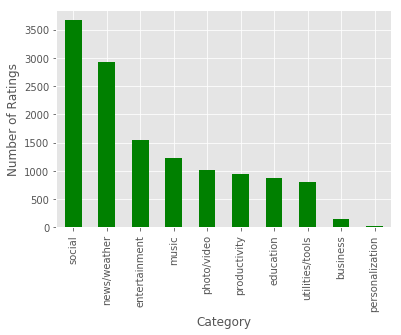

In [21]:
top10_new.groupby('Category')['Num_Reviewed'].mean().sort_values(ascending=False).plot.bar(color='g')
plt.ylabel('Number of Ratings')
print(top10_new.shape)

In [19]:
grouped_test=top10_new.groupby('Category')

C:\Users\Jensen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


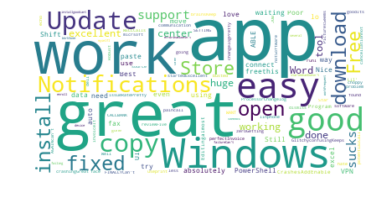

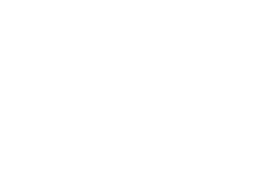

In [129]:
business_interaction=microsoft_new[microsoft_new['Category']=='business']
business_interaction['Comment_header']=business_interaction['Comment_header'].astype(str)

from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wc.generate(''.join(business_interaction['Comment_header']))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

C:\Users\Jensen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


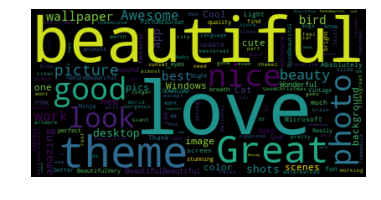

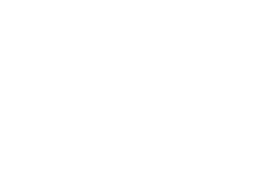

In [131]:
personal_interaction=microsoft_new[microsoft_new['Category']=='personalization']
personal_interaction['Comment_header']=personal_interaction['Comment_header'].astype(str)

from wordcloud import WordCloud
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(personal_interaction['Comment_header']))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

C:\Users\Jensen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


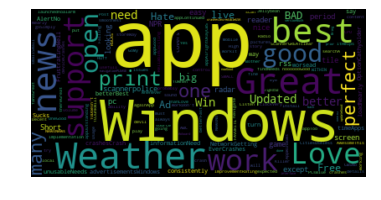

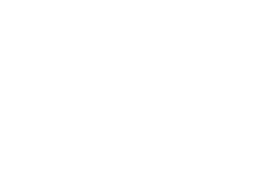

In [133]:
personal_interaction=microsoft_new[microsoft_new['Category']=='news/weather']
personal_interaction['Comment_header']=personal_interaction['Comment_header'].astype(str)

from wordcloud import WordCloud
wc = WordCloud(background_color="black", max_words=2000)
# generate word cloud
wc.generate(''.join(personal_interaction['Comment_header']))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(4, 3))
plt.axis("off")
plt.show()

In [142]:
top10_new['Category'].value_counts(normalize='FALSE').head(10)*100

personalization    23.024055
productivity       15.578465
photo/video        15.463918
entertainment      13.631157
utilities/tools    12.600229
music               7.216495
education           3.780069
social              3.665521
business            2.634593
news/weather        2.405498
Name: Category, dtype: float64

NameError: name 'group_size' is not defined

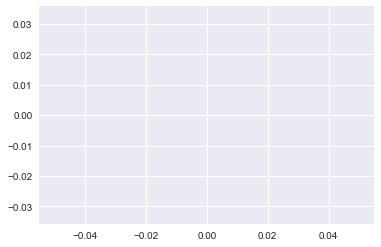

In [141]:
top10_new['Category'].value_counts(normalize='FALSE').head(10)*100

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
